# Analysis of Android app reviews

## Introduction

This Jupyter notebook is for 


## Setup

This notebook was created using [Python version] and the following packages:

- google_play_scraper
- pandas
- numpy

To run this notebook, please make sure you have these packages installed.

## Author

Art Kreimer
artiom.kreimer@gmail.com
https://www.linkedin.com/in/artkreimer/
https://www.artkreimer.com/

In [3]:
#installing of the google-play-scraper
#!pip install google-play-scraper
#!pip install keybert

In [1]:
#initialization
from google_play_scraper import app,Sort, reviews_all
import pandas as pd
import numpy as np

## Getting all Scotiabank Android app reviews using scrapper

In [3]:
all_reviews = reviews_all(
    'com.scotiabank.banking',
    #'com.scotiabank.cca.mobile'
    #'com.bmo.mobile',
    #'com.cibc.android.mobi',
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    country='ca', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)


In [4]:
df_reviews = pd.DataFrame(np.array(all_reviews),columns=['review'])
df_reviews = df_reviews.join(pd.DataFrame(df_reviews.pop('review').tolist()))
df_reviews['at'] = df_reviews['at'].astype(str)
df_reviews.head()



,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,ec9b7b2f-6bbc-41f8-82ed-1d974d680a6e,Jean-Yves Deschenes,https://play-lh.googleusercontent.com/a/AGNmyx...,easy to use,4,0,20.48.0,2023-05-01 12:56:02,None,NaT
1,52b71561-4532-4664-a6a1-672135e4333d,Eddie Santiago,https://play-lh.googleusercontent.com/a/AGNmyx...,best app ever,5,0,20.48.0,2023-05-01 12:10:22,None,NaT
2,09f6c653-13a0-438b-a68a-729f07d8bef5,Cori M,https://play-lh.googleusercontent.com/a-/ACB-R...,"The ""pending transactions"" for my credit card ...",2,0,None,2023-05-01 11:56:14,None,NaT
3,0ed3a351-ca0f-4569-ab4f-8eb5a0aeeb16,Lijon jose,https://play-lh.googleusercontent.com/a-/ACB-R...,nice financial service,5,0,20.48.0,2023-05-01 11:16:41,None,NaT
4,2970e8d8-0c5c-4ed7-87dd-b34ee37dcb94,Elizabeth Viool,https://play-lh.googleusercontent.com/a/AGNmyx...,Scotia Bank has been there for me for the last...,5,0,20.48.0,2023-05-01 08:03:42,None,NaT


In [5]:
df_reviews['date']=df_reviews['at'].astype(str).str.split(' ')
df_reviews['date'].head()
df_reviews[['date','time']]=df_reviews['at'].astype(str).str.split(' ', expand=True)
df_reviews['date'] = pd.to_datetime(df_reviews['date'], format='%Y-%m-%d')
df_reviews['year'] = df_reviews['date'].dt.year
df_reviews['month'] = df_reviews['date'].dt.month
df_reviews['repliedbool']=df_reviews['repliedAt'].astype(str)!="NaT"




<AxesSubplot:xlabel='year,month'>

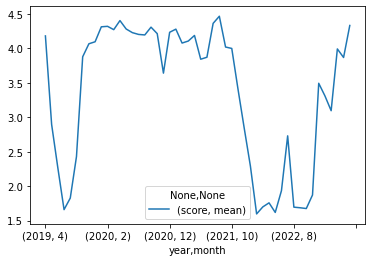

In [6]:
df_reviews.groupby(['year','month']).agg({'score':['mean']}).plot.line()

In [7]:
df_reviews.to_csv('~/Downloads/app_reviews_data_02052023.csv')

### Converting data formats and adding new data points for easier analysis

In [8]:


# df_busu['date']=df_busu['at'].astype(str).str.split(' ')
# df_busu['date'].head()
# df_busu[['date','time']]=df_busu['at'].astype(str).str.split(' ', expand=True)
# df_busu['date'] = pd.to_datetime(df_busu['date'], format='%Y-%m-%d')
# df_busu['year'] = df_busu['date'].dt.year
# df_busu['month'] = df_busu['date'].dt.month
# df_busu['repliedbool']=df_busu['repliedAt'].astype(str)!="NaT"


# df_busu['repliedbool'].describe()

## Percentage of Responses to App reviews that are 3 Stars and lower 

40       Hello Esteban, we're sorry to hear that you ha...
74       Hi John, we are sorry to hear that you are hav...
110      Hi Rob, we are sorry to hear that you are havi...
175      Hello, we appreciate your concern about our 2S...
189      Hi there, we’re sorry to hear you that you're ...
                               ...                        
21452            Thank you so much! We're glad you like it
21454    Thanks for sharing your thoughts! We’re glad t...
21455    We're so glad to hear you like the new app! Th...
21457    We’re so glad to hear you’re liking the new ap...
21470    Good news! The future dated bill payments feat...
Name: replyContent, Length: 2177, dtype: object

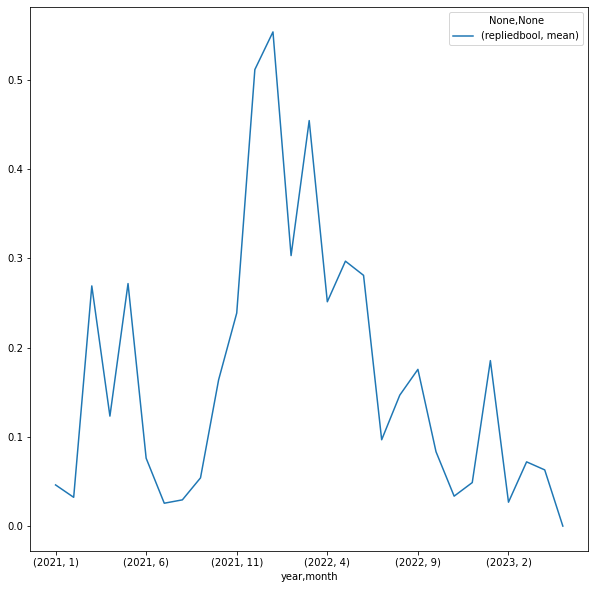

In [9]:
df_reviews[(df_reviews['score']<4 ) & 
           (df_reviews['year']>2020)].groupby(['year','month']).agg({'repliedbool':['mean']}).plot.line(figsize=(10,10))
df_reviews[df_reviews['repliedbool']==True]['replyContent']

## Average monthly review score 

<AxesSubplot:xlabel='year,month'>

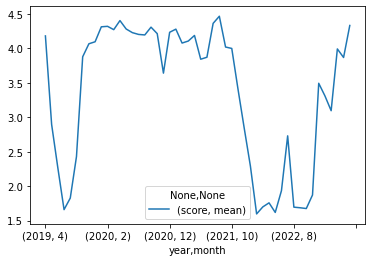

In [10]:
df_reviews.groupby(['year','month']).agg({'score':['mean']}).plot.line()

In [11]:
df_reviews_2021_2022=df_reviews[df_reviews['date']>'2021-01-01']

In [13]:
df_reviews_2021_2022.groupby(['year','month']).agg({'score':['count','mean']})#.plot.line(figsize=(15, 15))

score          
           count      mean
year month                
2021 1       345  4.272464
     2       256  4.078125
     3       354  4.107345
     4       361  4.188366
     5       345  3.843478
     6       320  3.871875
     7       261  4.363985
     8       246  4.467480
     9       293  4.020478
     10      239  4.000000
     11      326  3.411043
     12      445  2.844944
2022 1       384  2.291667
     2       176  1.596591
     3       262  1.698473
     4       202  1.757426
     5       186  1.618280
     6       228  1.934211
     7       204  2.730392
     8       249  1.694779
     9        86  1.686047
     10      123  1.674797
     11      179  1.871508
     12      330  3.493939
2023 1       280  3.310714
     2       230  3.095652
     3       955  3.992670
     4       418  3.868421
     5         6  4.333333

<AxesSubplot:xlabel='year,month'>

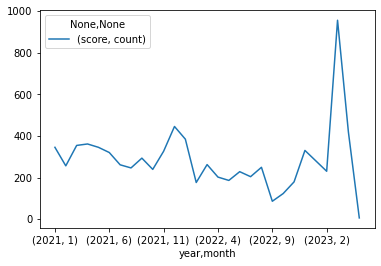

In [14]:
df_reviews_2021_2022.groupby(['year','month']).agg({'score':['count']}).plot.line()

# Analyzing all reviews between June 1st, 2022 and Oct 1st, 2022 

In [20]:
df_reviews_2021_2022= df_reviews_2021_2022[(df_reviews_2021_2022['date']>'2022-06-01') & (df_reviews_2021_2022['date']<'2022-11-01') ]
df_reviews_2021_2022['content']=df_reviews_2021_2022['content'].str.lower()

df_reviews_2021_2022['content_lower']=df_reviews_2021_2022['content'].str.lower()


In [24]:
print("Number of reviews we replied to", len(df_reviews_2021_2022[df_reviews_2021_2022['repliedAt'].astype(str)!='NaT']))
print("Total number of reviews",len(df_reviews_2021_2022))
print("Reply rate", len(df_reviews_2021_2022[df_reviews_2021_2022['repliedAt'].astype(str)!='NaT'])
      /len(df_reviews_2021_2022))

Number of reviews we replied to 128
Total number of reviews 916
Reply rate 0.13973799126637554


In [26]:
print("Average Review Score", df_reviews_2021_2022['score'].mean())

Average Review Score 1.9890829694323144


### number of reviews and average score 

In [27]:
df_reviews_2021_2022.groupby(['year','month']).agg({'score':['count','mean']})

score          
           count      mean
year month                
2022 6       229  1.925764
     7       209  2.698565
     8       258  1.717054
     9        88  1.670455
     10      132  1.719697

<AxesSubplot:xlabel='reviewCreatedVersion'>

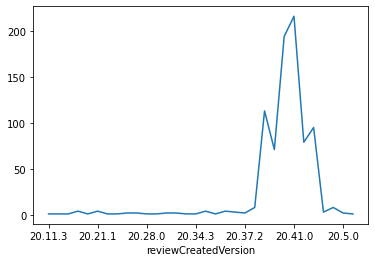

In [68]:

df_jan=df_jan.sort_values('reviewCreatedVersion')
#print(df_jan.head())
df_jan_grouped_by_version = df_jan.groupby(['reviewCreatedVersion'])['score'].count() #.plot.line()

df_jan_grouped_by_version.plot.line()


# What our customer are talking about - Wordcloud

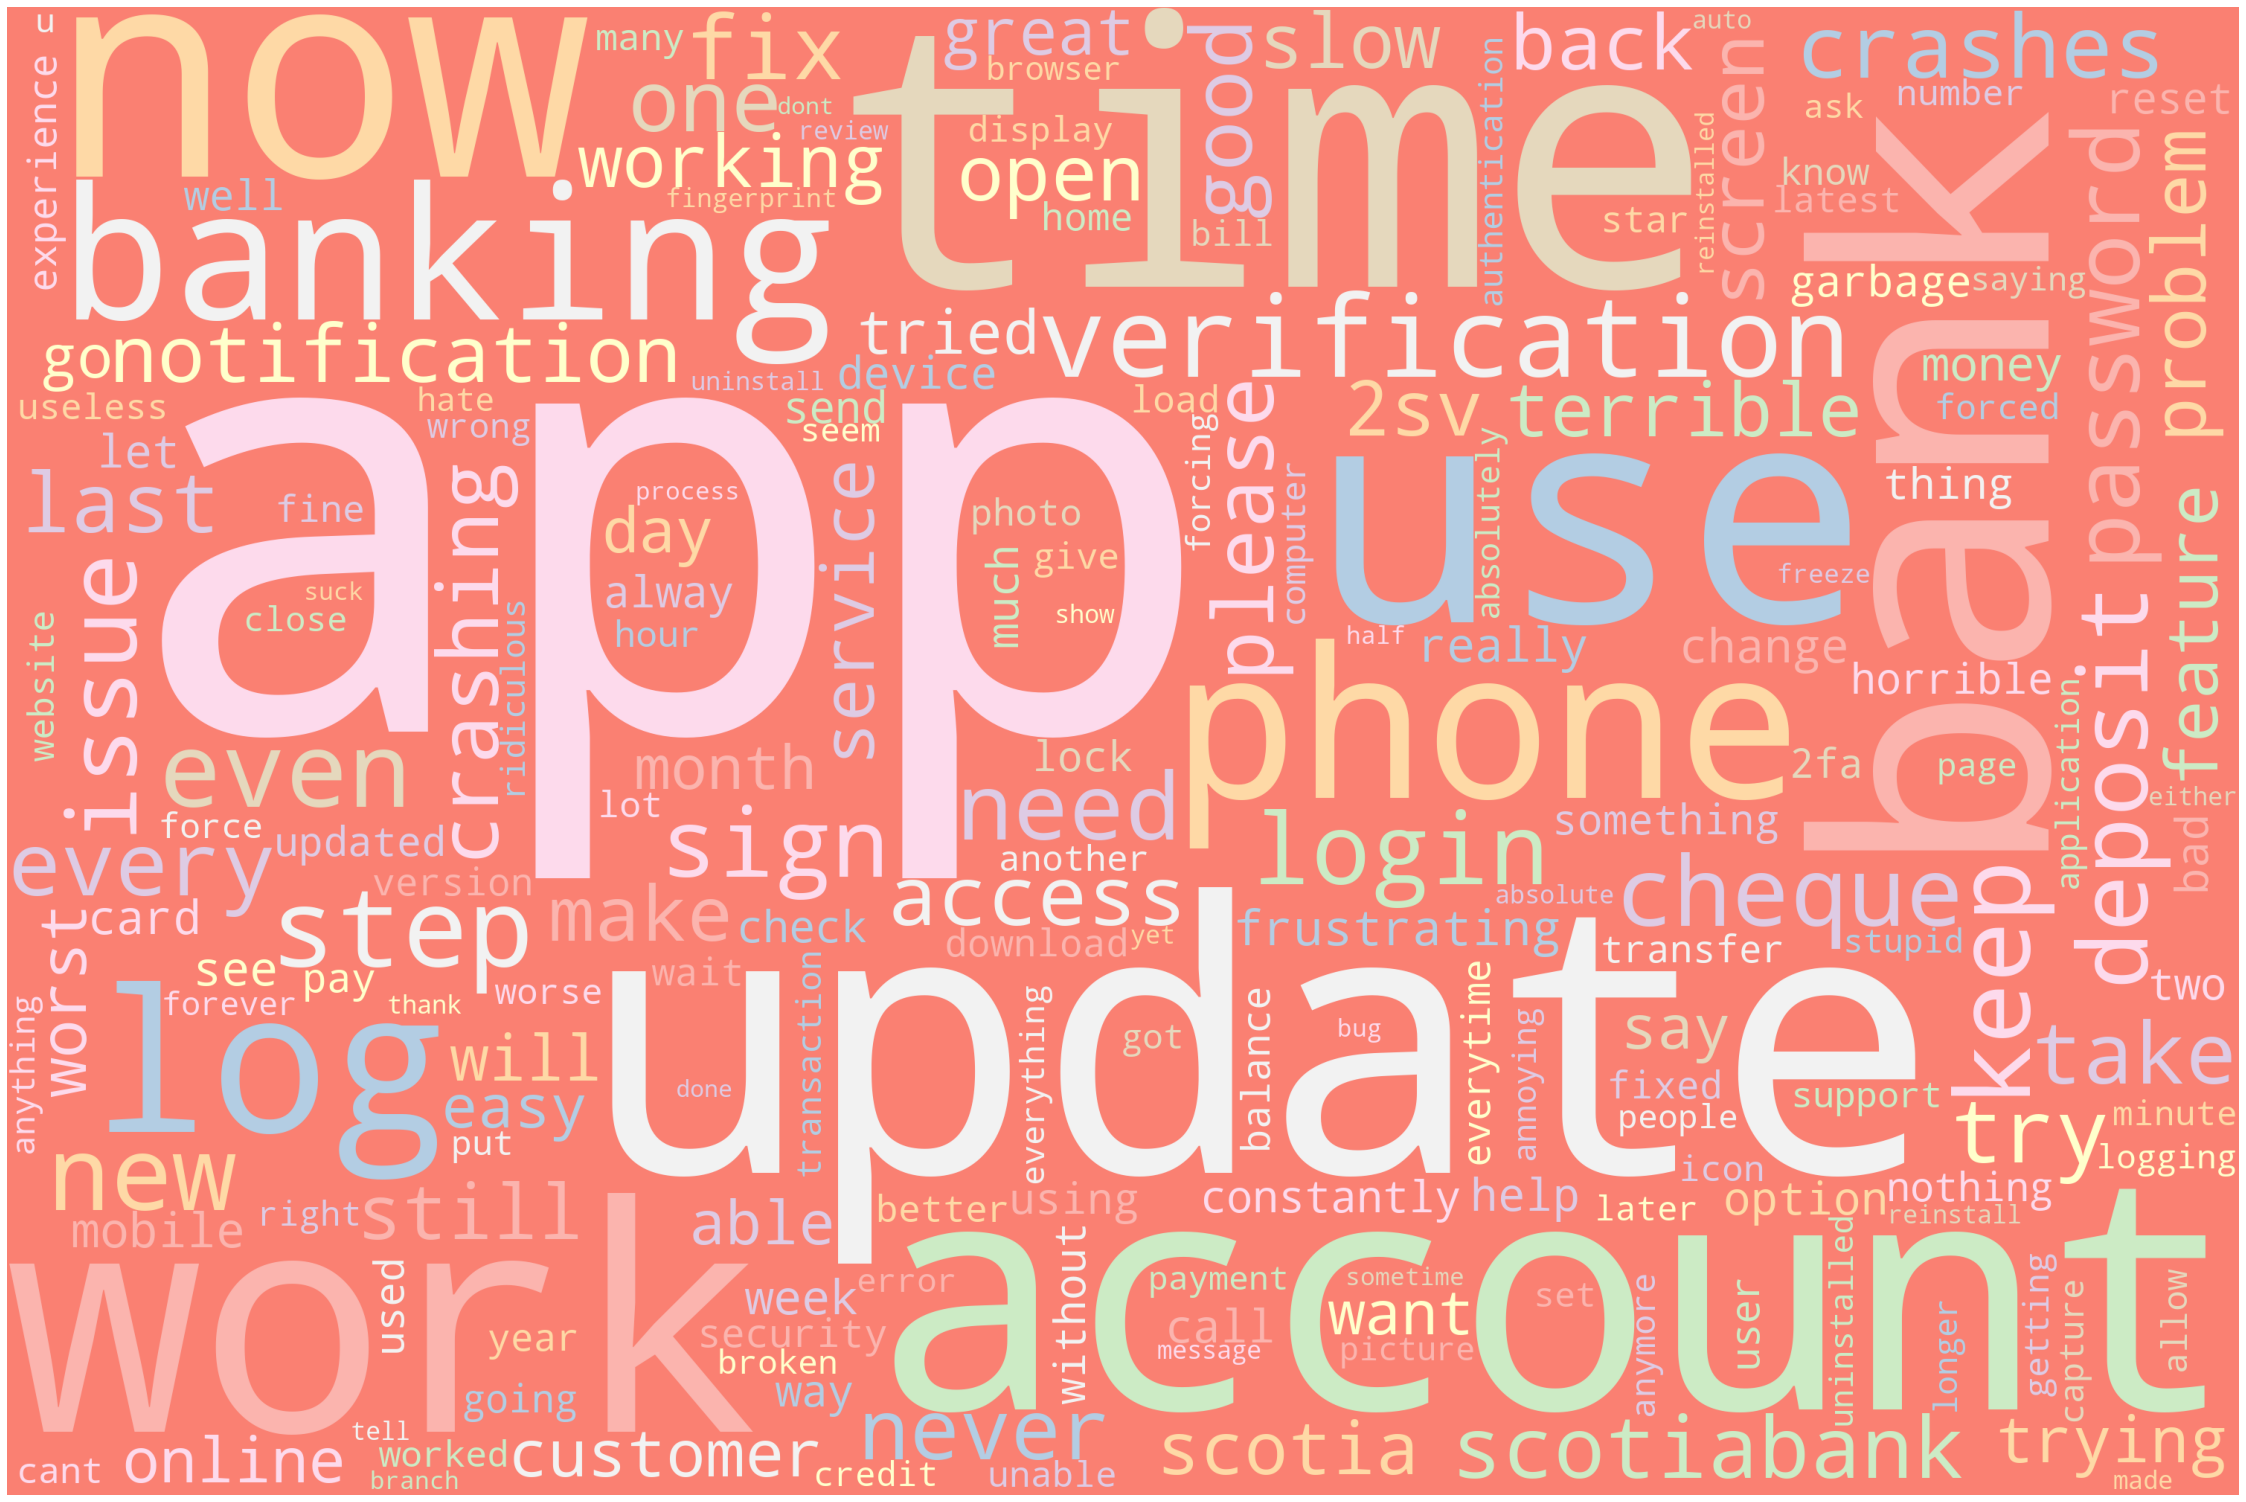

In [28]:
# with open('data.txt', 'r') as file:
#     data = file.read().replace('\n', '')
import matplotlib.pyplot as plt
import os


# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

# Import package
from wordcloud import WordCloud, STOPWORDS

product_stopwords = {}#{"products","scotiabank","skill","skills","will","day","is","this","role","right","for","product","you","experience", "minimum", "digital","scotia"}


# text = df_jan['content'].astype(str).values 

text=' '.join(df_reviews_2021_2022['content'])

STOPWORDS=STOPWORDS.union(product_stopwords)

# Generate word cloud
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, 
                      background_color='salmon', colormap='Pastel1', 
                      collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)

## Extracting the keywords 

In [ ]:
# script.py
from keybert import KeyBERT
df_reviews_2021_2022=pd.read_csv("~/downloads/caribean_app_review_data.csv")
df_reviews_2021_2022['content']=df_reviews_2021_2022['content'].astype(str)
doc = ' '.join(df_reviews_2021_2022['content'])

kw_model = KeyBERT()
#keywords = kw_model.extract_keywords(doc)

#kw_model.extract_keywords(doc, keyphrase_ngram_range=(3, 3), stop_words='english',
#                              use_maxsum=True, nr_candidates=20, top_n=5)

print(kw_model.extract_keywords(doc, keyphrase_ngram_range=(1, 1), stop_words=None,top_n=50))

In [1]:
from textblob import TextBlob, Word

sentence = text

s = TextBlob(sentence)
doc = " ".join([w.lemmatize() for w in s.words])

kw_model = KeyBERT()
keywords = kw_model.extract_keywords(doc)


print(kw_model.extract_keywords(doc, keyphrase_ngram_range=(1, 1), stop_words=None,top_n=50))


NameError: name 'text' is not defined

### Distribution of replies to reviews based on review score

In [60]:
df_jan.groupby(['score','repliedbool'])['score'].count()

score  repliedbool
1      False          388
       True           102
2      False           75
       True             5
3      False           46
       True             5
4      False           43
       True             3
5      False          120
       True             4
Name: score, dtype: int64

In [44]:
df_2sv=df_jan[df_jan['content'].str.contains('two|2sv|verif|step|login', regex=True)]
df_2sv.groupby(['score','repliedbool'])['score'].count()

score  repliedbool
1      False          256
       True           224
2      False           30
       True            20
3      False           15
       True             5
4      False           10
       True             6
5      False            5
Name: score, dtype: int64

1942


<AxesSubplot:xlabel='year,month'>

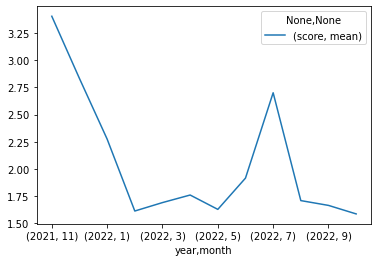

In [46]:
print(len(df_jan[df_jan['score']<3]))
#print(len(df_reintstall))
#pd.set_option('display.max_colwidth', -1)
#print(df_reintstall[['content','date','score']][:10])
df_jan.groupby(['year','month']).agg({'score':['mean']}).plot.line()

In [72]:
df_jan['2sv']=df_jan['content'].str.contains('two|2sv|2fa|verif|step|factor|ident', regex=True)
df_jan['login']=df_jan['content'].str.contains('log|sign', regex=True)
df_jan['crash']=df_jan['content'].str.contains('reinstal|crash|reboot|download|reset|uninstal', regex=True)
df_jan['update']=df_jan['content'].str.contains('update', regex=True)
df_jan['rdc']=df_jan['content'].str.contains('deposit|cheq', regex=True)
df_jan['all']=df_jan['content'].str.contains('two|2sv|2fa|verif|step|factor|ident|deposit|cheq|log|sign|reinstal|crash|rebo|download|reset|uninstal|update|deposit|cheq', regex=True)

<AxesSubplot:xlabel='year,month'>

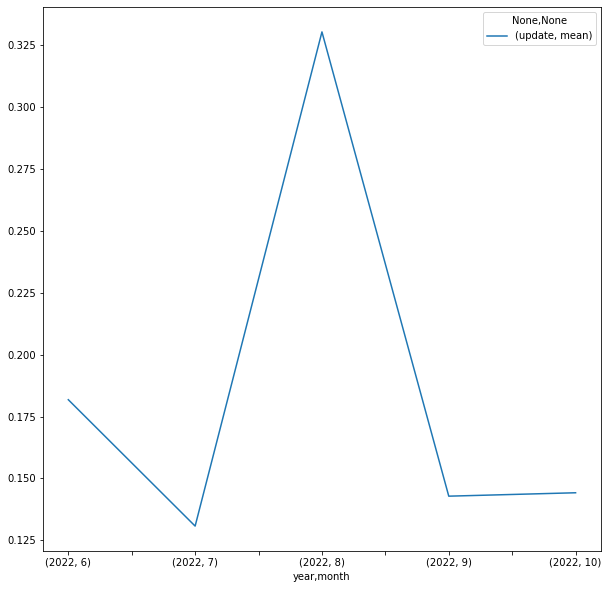

In [73]:
df_jan[df_jan['score']<4].groupby(['year','month']).agg({'update':['mean']}).plot.line(figsize=(10,10))

In [49]:
len(df_jan[(df_jan['date']>'2022-09-01') & (df_jan['score']<3) & ((df_jan['2sv']) | (df_jan['login']) | (df_jan['crash']))])/len(df_jan[(df_jan['date']>'2022-09-01') &(df_jan['score']<3)])

0.5112781954887218

<AxesSubplot:xlabel='year,month'>

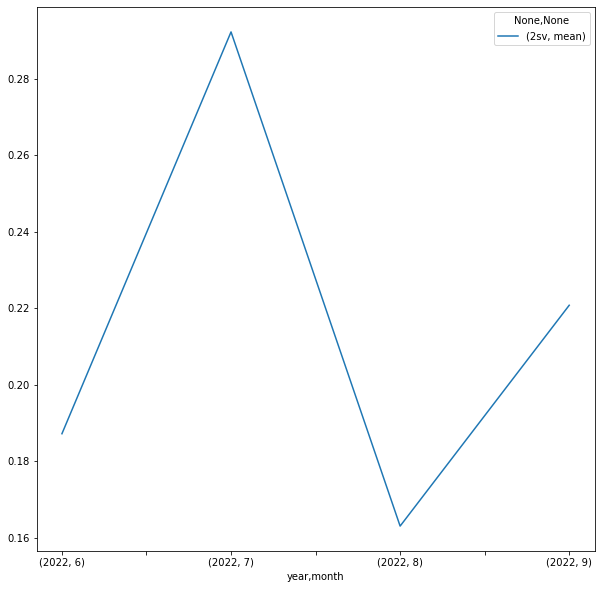

In [57]:
df_jan['2sv']=[1 if x else 0 for x in df_jan['2sv']]
df_jan[df_jan['score']<4].groupby(['year','month']).agg({'2sv':['mean']}).plot.line(figsize=(10,10))

In [74]:
df_jan['2sv']=[1 if x else 0 for x in df_jan['2sv']]
df_jan['login']=[1 if x else 0 for x in df_jan['login']]
df_jan['crash']=[1 if x else 0 for x in df_jan['crash']]
df_jan['update']=[1 if x else 0 for x in df_jan['update']]
df_jan['rdc']=[1 if x else 0 for x in df_jan['rdc']]
df_jan['all']=[1 if x else 0 for x in df_jan['all']]

In [75]:
df_jan.to_csv("~/downloads/android_reviews_june-oct.csv")

In [76]:
df_jan[df_jan['crash']==1]['content']

818    it keeps crashing. i'm now behind on bills. i ...
736    usually app is fine but for the last week or s...
239    crashing every time i try to move money in my ...
243                                       keeps crashing
151    does not work. won't even take me to the login...
                             ...                        
604    a few issues i have with the app one : when i ...
803    uninstalling and trying again i'm getting boot...
831    i enter my card number and password info and i...
848                                 app keeps crashing !
881    it's not working !! the app crashes everytime ...
Name: content, Length: 199, dtype: object

In [336]:
len(df_jan[((df_jan['date']>'2022-09-01') & (df_jan['score']<3) & ~((df_jan['2sv']) | (df_jan['login']) | (df_jan['crash'])))])/len(df_jan[(df_jan['date']>'2022-09-01') &(df_jan['score']<3)])

0.4270833333333333

In [28]:
#Graph of the bad review replies by developer 
df_jan[df_jan['score']<4].groupby(['year','month']).agg({'repliedbool':['mean']}).plot.line()

KeyError: 'login'

In [342]:
len(df_jan[df_jan['repliedbool']])/len(df_jan)

0.25863284002818887

In [344]:
len(df_jan[(df_jan['repliedbool'])&(df_jan['date']>'2022-09-01') & (df_jan['score']<3)])/len(df_jan[(df_jan['date']>'2022-09-01') & (df_jan['score']<3)])

0.16666666666666666